# NetworkXによる最大流最小カット

対応する動画：[NetworkXによるネットワーク分析　⑭最大流最小カット【研究で使うPython #46】](https://youtu.be/K81UP8BNZvY)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 必要モジュールのインポート

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## ネットワークの生成

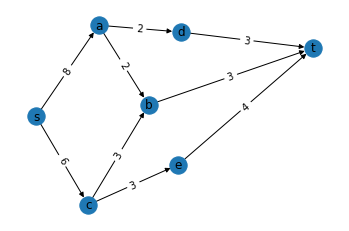

In [2]:
G = nx.DiGraph() # 空の有向グラフ生成

G.add_edge('s', 'a', capacity=8)
G.add_edge('s', 'c', capacity=6)
G.add_edge('a', 'b', capacity=2)
G.add_edge('a', 'd', capacity=2)
G.add_edge('b', 't', capacity=3)
G.add_edge('c', 'b', capacity=3)
G.add_edge('c', 'e', capacity=3)
G.add_edge('d', 't', capacity=3)
G.add_edge('e', 't', capacity=4)

# ばねモデルでノード配置
pos = nx.spring_layout(G)

# 描画
nx.draw_networkx_edges(G, pos) # エッジ
nx.draw_networkx_nodes(G, pos) # ノード
nx.draw_networkx_labels(G, pos) # ラベル
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v):d['capacity'] for u, v, d in G.edges(data=True)}) # 容量
plt.axis('off')
plt.show()

## 最大流を求める

In [3]:
flow_value, flow_dict = nx.maximum_flow(G, 's', 't')
print('Maximum flow value from s to t:', flow_value)
print('s-a:', flow_dict['s']['a'])
print('s-c:', flow_dict['s']['c'])
print('a-b:', flow_dict['a']['b'])
print('a-d:', flow_dict['a']['d'])
print('b-t:', flow_dict['b']['t'])
print('c-b:', flow_dict['c']['b'])
print('c-e:', flow_dict['c']['e'])
print('d-t:', flow_dict['d']['t'])
print('e-t:', flow_dict['e']['t'])

Maximum flow value from s to t: 8
s-a: 4
s-c: 4
a-b: 2
a-d: 2
b-t: 3
c-b: 1
c-e: 3
d-t: 2
e-t: 3


## 最小カットを求める

In [4]:
cut_value, partition = nx.minimum_cut(G, 's', 't')
reachable, non_reachable = partition
print('minimum cut value between s and t:', cut_value)
print('reachable nodes from s:', reachable)
print('unreachable nodes from s:', non_reachable)

minimum cut value between s and t: 8
reachable nodes from s: {'b', 'a', 'c', 's'}
unreachable nodes from s: {'t', 'd', 'e'}
